In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

First I created a program to compute the 'number bracelet' for two random numbers less than 10.

In [23]:
num_Iter=0
var1=np.random.randint(0,9)
var2=np.random.randint(0,9)


def Bracelets(var1, var2):
    stop=False
    mod=(var1+var2)%10
    num_Iter=1
    temp=var2
    while (stop==False):
        temp2=mod
        mod= (temp+mod)%10
   
        temp=temp2
        num_Iter=num_Iter+1
        if((mod==var2) and (temp==var1)):
            stop=True

    return num_Iter

val=Bracelets(var1, var2)
print("Number of iterations is: " ,val)

Number of iterations is:  60


To get an idea regarding if we always have convergence, I fixed the first number to be 0 and varied the second number from 0 to 9. I computed the number bracelet for each of these pairs of numbers, outputting the number of iterations required to return to the start. I then varied the first number whilst keeping the second fixed at 0 and carried out the same analysis.

In [24]:
results=np.zeros(10)
results[0]=1
for i in range(1,10):
    results[i]=Bracelets(0,i)  
print("The number of iterations required for the first number fixed at 0 and the second ranging from 0 to 9 were: " ,results)
results=np.zeros(10)
results[0]=1
for i in range(1, 10):
    results[i]=Bracelets(i,0)
print("The number of iterations required for the second number fixed at 0 and the first ranging from 0 to 9 were: " ,results)

The number of iterations required for the first number fixed at 0 and the second ranging from 0 to 9 were:  [ 1. 60. 20. 60. 20.  3. 20. 60. 20. 60.]
The number of iterations required for the second number fixed at 0 and the first ranging from 0 to 9 were:  [ 1. 60. 20. 60. 20.  3. 20. 60. 20. 60.]


Next, I generalised to all possible pairs of numbers. I also introduced variables to count how many of the 100 pairs of numbers required 3,4,12,20 and 60 iterations to return to the start.

In [25]:
results=np.zeros(100)
results[0]=1
k=1
for i in range(0,10):
    for j in range(0,10):
        if (i+j >0):
            results[k]=Bracelets(i,j)
            k=k+1
print(" Results are: " ,results)
no_3s=0
no_4s=0
no_12s=0
no_20s=0
no_60s=0

for i in range(100):
    if int(results[i])==3:
        no_3s=no_3s+1
    if int(results[i])==4:
        no_4s=no_4s+1
    if int(results[i])==12:
        no_12s=no_12s+1
    if int(results[i])==20:
        no_20s=no_20s+1
    if int(results[i])==60:
        no_60s=no_60s+1
print("Number requring 3 iterations: " ,no_3s)
print("Number requring 4 iterations: " ,no_4s)
print("Number requring 12 iterations: " ,no_12s)
print("Number requring 20 iterations: " ,no_20s)
print("Number requring 60 iterations: " ,no_60s)


 Results are:  [ 1. 60. 20. 60. 20.  3. 20. 60. 20. 60. 60. 60. 60. 12. 60. 60. 60. 60.
 12. 60. 20. 12. 20. 60. 20. 60.  4. 60. 20. 60. 60. 60. 60. 60. 12. 60.
 60. 60. 60. 12. 20. 60.  4. 60. 20. 60. 20. 12. 20. 60.  3. 60. 60. 60.
 60.  3. 60. 60. 60. 60. 20. 60. 20. 12. 20. 60. 20. 60.  4. 60. 60. 12.
 60. 60. 60. 60. 12. 60. 60. 60. 20. 60. 20. 60.  4. 60. 20. 60. 20. 12.
 60. 60. 12. 60. 60. 60. 60. 12. 60. 60.]
Number requring 3 iterations:  3
Number requring 4 iterations:  4
Number requring 12 iterations:  12
Number requring 20 iterations:  20
Number requring 60 iterations:  60


A created a scatter plot of the distribution of those pairs requiring each of the number of iterations to determine if there was some pattern.

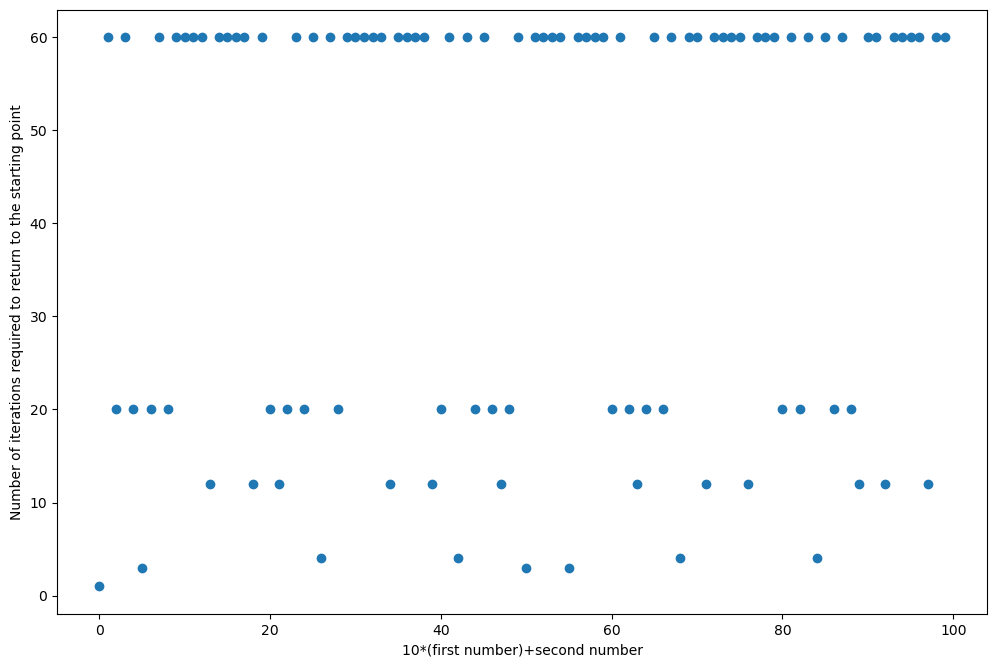

<Figure size 432x288 with 0 Axes>

In [26]:
x=np.zeros(100)
for i in range(100):
    x[i]=i

y=results
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("10*(first number)+second number")
plt.ylabel("Number of iterations required to return to the starting point")
plt.scatter(x,y)
plt.show()
plt.savefig("Assignment 1 scatter plot")

Below I create a table showing the number of each of the pairs requiring each number of iterations to return to the starting point.

In [27]:

from tabulate import tabulate
data = [["1", 1], 
        ["3", no_3s], 
        ["4", no_4s], 
        ["12", no_12s], ["20", no_20s], ["60", no_60s]]
col_names = ["Number of iterations to return to start", "Number of pairs"]
print(tabulate(data, headers=col_names))
  


  Number of iterations to return to start    Number of pairs
-----------------------------------------  -----------------
                                        1                  1
                                        3                  3
                                        4                  4
                                       12                 12
                                       20                 20
                                       60                 60


I now update my program to determine if we see the same result with the operation of addition modulo n, where n is general rather than 10. For each value of n I choose two random numbers smaller than n as my starting pair.

In [28]:
num_Iter=0
def Bracelets(var1, var2, n):
    stop=False
    mod=(var1+var2)%n
    num_Iter=1
    temp=var2
    while (stop==False):
        temp2=mod
        mod= (temp+mod)%n
   
        temp=temp2
        num_Iter=num_Iter+1
        if((mod==var2) and (temp==var1)):
            stop=True

    return num_Iter

for i in range(2,100000): 
    var1=np.random.randint(0,i-1)
    var2=np.random.randint(0,i-1)
    val=Bracelets(var1, var2, i)

This function ran with values of n from 2 to 1000000. This increases my confidence in the hypothesis that the bracelets return to their starting points with the operation addition modulo n for general n rather than n fixed at 10.